# Telecom churn case study

Authors
#### 1. Akash Mhaske
#### 2. Rahul Rao



# Business Understanding

- Analysing customer churn - if a customer switch from one network to other
- new customer aquisition is expensive
- existing customer retention is more important now

- Operator want know which customer will churn and high risk
- build predictive model to identify customers with high risk of churn and 
- identify main indicators of this churn

- Two modes of payment - Prepaid and Postpaid
- Postpaid - Customer use the service and pay the amount at the end. when such customers churn they inform the operator beforehand
- Prepaid - customer pay the amount beforehand and then use the service. when such customers churn, they just stop using the services without any notice. its difficult to identify if the customer has churned or has temporarily stopped using the services.

- Define high value customers because these are the only one who contribute to 80% of the revenue, so we need to retain these high valued customers and predict churn on these high value customers

- dataset contains information of months June, July, August, September encoded as 6,7,8, 9

- `business objective is to predict the churn in the last (i.e. the ninth) month using the dataset (features) from the first three months`

# Importing Essential Libraries

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering warnings
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

# Changing display settings for rows and columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Importing and Reading the data

In [2]:
# Reading the dfset and storing it in 'df'
df = pd.read_csv('telecom_churn_data.csv')

# Checking the dataset
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [3]:
# Inspecting datatypes and null values in the dfset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9269 entries, 0 to 9268
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              flo

In [4]:
# Checking the shape of the dataset
df.shape

(9269, 226)

In [5]:
# Describing the numeric columns
df.describe(include='all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.269000e+03     9269.0          9174.0          9174.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001203e+09      109.0             0.0             0.0   
std      6.995378e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000596e+09      109.0             0.0             0.0   
50%      7.001197e+09      109.0             0.0             0.0   
75%      7.001814e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count           9174.0                 9269                 9199   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                 9269                 9199   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9       arpu_6       arpu_7  \
count                  9151                 9097  9269.000000  9269.000000   
unique                    1                    1          NaN          NaN   
top               8/31/2014            9/30/2014          NaN          NaN   
freq                   9151                 9097          NaN          NaN   
mean                    NaN                  NaN   288.184729   278.106347   
std                     NaN                  NaN   313.740708   308.389350   
min                     NaN                  NaN -2041.228000 -2014.045000   
25%                     NaN                  NaN    94.721000    90.206000   
50%                     NaN                  NaN   202.076000   192.242000   
75%                     NaN                  NaN   377.688000   367.182000   
max                     NaN                  NaN  5080.971000  6453.689000   

             arpu_8       arpu_9  onnet_mou_6  onnet_mou_7   onnet_mou_8  \
count   9269.000000  9269.000000  8929.000000  8909.000000   8757.000000   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean     276.716831   258.758440   136.339303   136.600397    138.183985   
std      300.239026   292.955509   305.755282   313.437935    334.558455   
min     -945.808000  -267.243000     0.000000     0.000000      0.000000   
25%       82.233000    62.250000     7.540000     6.710000      6.490000   
50%      194.236000   177.600000    34.610000    32.590000     32.590000   
75%      373.013000   356.125000   120.930000   114.860000    115.290000   
max     4269.998000  5288.685000  6459.340000  6372.530000  10752.560000   

         onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count    8538.000000   8929.000000   8909.000000   8757.000000   8538.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      133.881216    201.647280    197.449489    190.873770    182.278631   
std       331.203530    325.641869    335.86

In [6]:
# Checking missing value percentage in each column

missing_val = {i:round((df[i].isnull().sum()/len(df)*100),2)
               for i in df.columns
               if (df[i].isnull().sum()/len(df) * 100) > 0}
missing_val

{'aon': 0.01,
 'arpu_2g_6': 74.45,
 'arpu_2g_7': 74.02,
 'arpu_2g_8': 73.23,
 'arpu_2g_9': 73.82,
 'arpu_3g_6': 74.45,
 'arpu_3g_7': 74.02,
 'arpu_3g_8': 73.23,
 'arpu_3g_9': 73.82,
 'aug_vbc_3g': 0.01,
 'av_rech_amt_data_6': 74.45,
 'av_rech_amt_data_7': 74.02,
 'av_rech_amt_data_8': 73.23,
 'av_rech_amt_data_9': 73.82,
 'count_rech_2g_6': 74.45,
 'count_rech_2g_7': 74.02,
 'count_rech_2g_8': 73.23,
 'count_rech_2g_9': 73.82,
 'count_rech_3g_6': 74.45,
 'count_rech_3g_7': 74.02,
 'count_rech_3g_8': 73.23,
 'count_rech_3g_9': 73.82,
 'date_of_last_rech_6': 1.64,
 'date_of_last_rech_7': 2.11,
 'date_of_last_rech_8': 3.87,
 'date_of_last_rech_9': 5.09,
 'date_of_last_rech_data_6': 74.45,
 'date_of_last_rech_data_7': 74.02,
 'date_of_last_rech_data_8': 73.23,
 'date_of_last_rech_data_9': 73.82,
 'fb_user_6': 74.45,
 'fb_user_7': 74.02,
 'fb_user_8': 73.23,
 'fb_user_9': 73.82,
 'ic_others_6': 3.68,
 'ic_others_7': 3.89,
 'ic_others_8': 5.53,
 'ic_others_9': 7.9,
 'isd_ic_mou_6': 3.68,
 'i

# Data Preparation / Cleaning

In [7]:
# Dropping features with no variance

for i in df.columns:
    if df[i].nunique() == 1:
        print("\nColumn",i,"has", df[i].nunique(),"unique value")
        print("Drop the column",i)
        df.drop(i,axis=1,inplace = True)

print("\nShape of the dataset:",df.shape)


Column circle_id has 1 unique value
Drop the column circle_id

Column loc_og_t2o_mou has 1 unique value
Drop the column loc_og_t2o_mou

Column std_og_t2o_mou has 1 unique value
Drop the column std_og_t2o_mou

Column loc_ic_t2o_mou has 1 unique value
Drop the column loc_ic_t2o_mou

Column last_date_of_month_6 has 1 unique value
Drop the column last_date_of_month_6

Column last_date_of_month_7 has 1 unique value
Drop the column last_date_of_month_7

Column last_date_of_month_8 has 1 unique value
Drop the column last_date_of_month_8

Column last_date_of_month_9 has 1 unique value
Drop the column last_date_of_month_9

Column std_og_t2c_mou_6 has 1 unique value
Drop the column std_og_t2c_mou_6

Column std_og_t2c_mou_7 has 1 unique value
Drop the column std_og_t2c_mou_7

Column std_og_t2c_mou_8 has 1 unique value
Drop the column std_og_t2c_mou_8

Column std_og_t2c_mou_9 has 1 unique value
Drop the column std_og_t2c_mou_9

Column std_ic_t2o_mou_6 has 1 unique value
Drop the column std_ic_t2o

In [8]:
# Checking if '	mobile_number' is a unique column with no duplicates
df.duplicated(subset = 'mobile_number').sum()

0

In [9]:
# Checking number of unique values in column mobile_number

df['mobile_number'].nunique()

9269

In [10]:
# Dropping column 'mobile_number' as it has all unique values meaning too much variance

df.drop('mobile_number',axis=1,inplace=True)

## Missing Values

In [11]:
# Finding out categorical columns, columns having values in range 2-4
cat_col =[]
for i in df.columns:
    if df[i].nunique() in [2,3,4]:
        cat_col.append(i)

cat_col

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [12]:
# Imputing missing values with '-1' in categorical columns where -1 would be a new category

for i in cat_col:
    df[i].fillna(value=-1, inplace=True)

In [13]:
# Checking imputations

for i in cat_col:
    print(df[i].value_counts())
    print('---------')

-1.0    6901
 0.0    2317
 1.0      51
Name: night_pck_user_6, dtype: int64
---------
-1.0    6861
 0.0    2366
 1.0      42
Name: night_pck_user_7, dtype: int64
---------
-1.0    6788
 0.0    2444
 1.0      37
Name: night_pck_user_8, dtype: int64
---------
-1.0    6842
 0.0    2398
 1.0      29
Name: night_pck_user_9, dtype: int64
---------
-1.0    6901
 1.0    2157
 0.0     211
Name: fb_user_6, dtype: int64
---------
-1.0    6861
 1.0    2166
 0.0     242
Name: fb_user_7, dtype: int64
---------
-1.0    6788
 1.0    2194
 0.0     287
Name: fb_user_8, dtype: int64
---------
-1.0    6842
 1.0    2087
 0.0     340
Name: fb_user_9, dtype: int64
---------


In [14]:
# Checking missing values again

missing_val = {i:round((df[i].isnull().sum()/len(df)*100),2)
               for i in df.columns
               if (df[i].isnull().sum()/len(df) * 100) > 0}
missing_val

{'aon': 0.01,
 'arpu_2g_6': 74.45,
 'arpu_2g_7': 74.02,
 'arpu_2g_8': 73.23,
 'arpu_2g_9': 73.82,
 'arpu_3g_6': 74.45,
 'arpu_3g_7': 74.02,
 'arpu_3g_8': 73.23,
 'arpu_3g_9': 73.82,
 'aug_vbc_3g': 0.01,
 'av_rech_amt_data_6': 74.45,
 'av_rech_amt_data_7': 74.02,
 'av_rech_amt_data_8': 73.23,
 'av_rech_amt_data_9': 73.82,
 'count_rech_2g_6': 74.45,
 'count_rech_2g_7': 74.02,
 'count_rech_2g_8': 73.23,
 'count_rech_2g_9': 73.82,
 'count_rech_3g_6': 74.45,
 'count_rech_3g_7': 74.02,
 'count_rech_3g_8': 73.23,
 'count_rech_3g_9': 73.82,
 'date_of_last_rech_6': 1.64,
 'date_of_last_rech_7': 2.11,
 'date_of_last_rech_8': 3.87,
 'date_of_last_rech_9': 5.09,
 'date_of_last_rech_data_6': 74.45,
 'date_of_last_rech_data_7': 74.02,
 'date_of_last_rech_data_8': 73.23,
 'date_of_last_rech_data_9': 73.82,
 'ic_others_6': 3.68,
 'ic_others_7': 3.89,
 'ic_others_8': 5.53,
 'ic_others_9': 7.9,
 'isd_ic_mou_6': 3.68,
 'isd_ic_mou_7': 3.89,
 'isd_ic_mou_8': 5.53,
 'isd_ic_mou_9': 7.9,
 'isd_og_mou_6': 3.

#### Most data (internet pack) related columns have high number of missing value i.e above 70% missing values
Let's analyse if they are MAR, MCAR and MNAR

In [15]:
df[(df['vol_2g_mb_6'] == 0)][['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6',
                               'count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6',
                               'vol_2g_mb_6','vol_3g_mb_6','arpu_3g_6','arpu_2g_6',
                               ]].isnull().sum()/df.shape[0]*100

date_of_last_rech_data_6    74.441687
total_rech_data_6           74.441687
max_rech_data_6             74.441687
count_rech_2g_6             74.441687
count_rech_3g_6             74.441687
av_rech_amt_data_6          74.441687
vol_2g_mb_6                  0.000000
vol_3g_mb_6                  0.000000
arpu_3g_6                   74.441687
arpu_2g_6                   74.441687
dtype: float64

#### The missing values are MNAR, from above data we can impute missing values with 0 column
Zero data usage or no data usage is corresponding to missing values in data(internet pack) related columns, we can assume that no data recharge was done so we will impute the missing values with 0

In [16]:
data_column_6 = ['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6',
                               'count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6',
                               'vol_2g_mb_6','vol_3g_mb_6','arpu_3g_6','arpu_2g_6']

In [17]:
# Imputing missing values in data_column_6 with 0
df[data_column_6] = df[data_column_6].fillna(0)

In similar way let's confirm our assumption about missing values for month 7,8,9

In [18]:
for i in ['7','8','9']:
    print(df[(df['vol_2g_mb_'+i] == 0)][['date_of_last_rech_data_'+i,'total_rech_data_'+i,'max_rech_data_'+i,
                               'count_rech_2g_'+i,'count_rech_3g_'+i,'av_rech_amt_data_'+i,
                               'vol_2g_mb_'+i,'vol_3g_mb_'+i,'arpu_3g_'+i,'arpu_2g_'+i]].isnull().sum()/df.shape[0]*100)
    print('-------------------')

date_of_last_rech_data_7    74.010141
total_rech_data_7           74.010141
max_rech_data_7             74.010141
count_rech_2g_7             74.010141
count_rech_3g_7             74.010141
av_rech_amt_data_7          74.010141
vol_2g_mb_7                  0.000000
vol_3g_mb_7                  0.000000
arpu_3g_7                   74.010141
arpu_2g_7                   74.010141
dtype: float64
-------------------
date_of_last_rech_data_8    73.22257
total_rech_data_8           73.22257
max_rech_data_8             73.22257
count_rech_2g_8             73.22257
count_rech_3g_8             73.22257
av_rech_amt_data_8          73.22257
vol_2g_mb_8                  0.00000
vol_3g_mb_8                  0.00000
arpu_3g_8                   73.22257
arpu_2g_8                   73.22257
dtype: float64
-------------------
date_of_last_rech_data_9    73.805157
total_rech_data_9           73.805157
max_rech_data_9             73.805157
count_rech_2g_9             73.805157
count_rech_3g_9             

In [19]:
# Imputing missing values with zero in other month's data related columns

for i in ['7','8','9']:
        data_column = ['date_of_last_rech_data_'+i,'total_rech_data_'+i,'max_rech_data_'+i,
                               'count_rech_2g_'+i,'count_rech_3g_'+i,'av_rech_amt_data_'+i,
                               'vol_2g_mb_'+i,'vol_3g_mb_'+i,'arpu_3g_'+i,'arpu_2g_'+i]
        df[data_column] = df[data_column].fillna(0)

In [20]:
# Checking missing values again

missing_val = {i:round(df[i].isnull().sum()/len(df)*100,2)
               for i in df.columns
              if df[i].isnull().sum()/len(df)*100 >0 }
missing_val

{'aon': 0.01,
 'aug_vbc_3g': 0.01,
 'date_of_last_rech_6': 1.64,
 'date_of_last_rech_7': 2.11,
 'date_of_last_rech_8': 3.87,
 'date_of_last_rech_9': 5.09,
 'ic_others_6': 3.68,
 'ic_others_7': 3.89,
 'ic_others_8': 5.53,
 'ic_others_9': 7.9,
 'isd_ic_mou_6': 3.68,
 'isd_ic_mou_7': 3.89,
 'isd_ic_mou_8': 5.53,
 'isd_ic_mou_9': 7.9,
 'isd_og_mou_6': 3.68,
 'isd_og_mou_7': 3.89,
 'isd_og_mou_8': 5.53,
 'isd_og_mou_9': 7.9,
 'jul_vbc_3g': 0.01,
 'jun_vbc_3g': 0.01,
 'last_day_rch_amt_6': 0.01,
 'last_day_rch_amt_7': 0.01,
 'last_day_rch_amt_8': 0.01,
 'last_day_rch_amt_9': 0.01,
 'loc_ic_mou_6': 3.68,
 'loc_ic_mou_7': 3.89,
 'loc_ic_mou_8': 5.53,
 'loc_ic_mou_9': 7.9,
 'loc_ic_t2f_mou_6': 3.68,
 'loc_ic_t2f_mou_7': 3.89,
 'loc_ic_t2f_mou_8': 5.53,
 'loc_ic_t2f_mou_9': 7.9,
 'loc_ic_t2m_mou_6': 3.68,
 'loc_ic_t2m_mou_7': 3.89,
 'loc_ic_t2m_mou_8': 5.53,
 'loc_ic_t2m_mou_9': 7.9,
 'loc_ic_t2t_mou_6': 3.68,
 'loc_ic_t2t_mou_7': 3.89,
 'loc_ic_t2t_mou_8': 5.53,
 'loc_ic_t2t_mou_9': 7.9,
 'loc_

so most data related columns with high number of missing values are imputed with zero meaning there was no data recharge by the customer

In [21]:
# Rename vbc columns to format 6,7,8 and 9

df.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                     'jul_vbc_3g':'vbc_3g_7',
                     'aug_vbc_3g':'vbc_3g_8',
                     'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

## Filter high value customers
High value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase i.e 6 & 7th month)


In [22]:
# Deriving a feature total_rch_amt_data calculated as total_rech_data * av_rech_amt_data

df['total_rch_amt_data_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_rch_amt_data_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']
df['total_rch_amt_data_8'] = df['total_rech_data_8'] * df['av_rech_amt_data_8']
df['total_rch_amt_data_9'] = df['total_rech_data_9'] * df['av_rech_amt_data_9']

In [23]:
# Dropping the original columns as they will become redundant and will cause multicollinearity

df.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
        'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],
       axis=1,inplace=True)

In [24]:
# Calculating average recharge amount including talktime recharge and data recharge

df['avg_rch_amt_6_7'] = df[['total_rch_amt_data_6','total_rch_amt_data_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

In [25]:
# Creating a new dataset to filter out high value customers

churn = df.copy()

In [26]:
# Filtering high value customers who have recharge an amount more that 70% of the average recharge amount

churn = churn[churn['avg_rch_amt_6_7'] >= (churn['avg_rch_amt_6_7'].quantile(0.7))]

In [27]:
# Checking the shape of the dataset

print('After filtering High Value Customers we are left with',churn.shape[0], "rows")

After filtering High Value Customers we are left with 2782 rows


In [28]:
# Storing missing value columns 

missing_val_cols = churn.columns[churn.isna().any()].tolist()
missing_val_cols

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',


Let's analyse missing value columns monthwise

In [29]:
# Analysing missing values in 6th month
missing_val_col_6 = [i for i in missing_val_cols if '_6' in i]

churn[missing_val_col_6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2782 entries, 0 to 9264
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   onnet_mou_6          2737 non-null   float64
 1   offnet_mou_6         2737 non-null   float64
 2   roam_ic_mou_6        2737 non-null   float64
 3   roam_og_mou_6        2737 non-null   float64
 4   loc_og_t2t_mou_6     2737 non-null   float64
 5   loc_og_t2m_mou_6     2737 non-null   float64
 6   loc_og_t2f_mou_6     2737 non-null   float64
 7   loc_og_t2c_mou_6     2737 non-null   float64
 8   loc_og_mou_6         2737 non-null   float64
 9   std_og_t2t_mou_6     2737 non-null   float64
 10  std_og_t2m_mou_6     2737 non-null   float64
 11  std_og_t2f_mou_6     2737 non-null   float64
 12  std_og_mou_6         2737 non-null   float64
 13  isd_og_mou_6         2737 non-null   float64
 14  spl_og_mou_6         2737 non-null   float64
 15  og_others_6          2737 non-null   f

Above columns are related to minutes of incoming calls and outgoing calls made within network or outside network.
Missing values in these columns are due to no calls made, hence can be imputed with zero.
Same applies for 7th and 8th month.

In [30]:
# Checking 8th and 9th month columns

missing_val_col_7 = [i for i in missing_val_cols if '_7' in i]
missing_val_col_8 = [i for i in missing_val_cols if '_8' in i]

print('\n----------7th Month-----------\n')
print(churn[missing_val_col_7].info())
print('\n----------8th Month-----------\n')
print(churn[missing_val_col_8].info())


----------7th Month-----------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2782 entries, 0 to 9264
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   onnet_mou_7          2736 non-null   float64
 1   offnet_mou_7         2736 non-null   float64
 2   roam_ic_mou_7        2736 non-null   float64
 3   roam_og_mou_7        2736 non-null   float64
 4   loc_og_t2t_mou_7     2736 non-null   float64
 5   loc_og_t2m_mou_7     2736 non-null   float64
 6   loc_og_t2f_mou_7     2736 non-null   float64
 7   loc_og_t2c_mou_7     2736 non-null   float64
 8   loc_og_mou_7         2736 non-null   float64
 9   std_og_t2t_mou_7     2736 non-null   float64
 10  std_og_t2m_mou_7     2736 non-null   float64
 11  std_og_t2f_mou_7     2736 non-null   float64
 12  std_og_mou_7         2736 non-null   float64
 13  isd_og_mou_7         2736 non-null   float64
 14  spl_og_mou_7         2736 non-null   float64
 15  og_ot

In [31]:
# Imputing missing values in above columns with 0 excluding the date column

for i in missing_val_cols:
    if "date" not in i:
        churn[i].fillna(0, inplace=True)


In [32]:
# Checking the dataset again

churn.head()

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
0    197.385   214.816   213.803   21.100         0.00         0.00   
7   1069.180  1349.850  3171.480  500.000        57.84        54.68   
8    378.721   492.223   137.362  166.787       413.69       351.03   
21   514.453   597.753   637.760  578.596       102.41       132.11   
23    74.350   193.897   366.966  811.480        48.96        50.66   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0          0.00         0.00          0.00          0.00          0.00   
7         52.29         0.00        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
21        85.14       161.63        757.93        896.68        983.39   
23        33.58        15.74         85.41         89.36        205.89   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0           0.00           0.00           0.00           0.00            0.0   
7           0.00          16.23          33.49          31.64            0.0   
8         108.71           0.00           0.00           0.00            0.0   
21        869.89           0.00           0.00           0.00            0.0   
23        111.88           0.00           0.00           0.00            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            0.00           0.00           0.00            0.0   
7           23.74          12.59          38.06            0.0   
8            0.00           0.00           0.00            0.0   
21           0.00           0.00           0.00            0.0   
23           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28              0.00   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               0.00              0.00              0.00              0.00   
7             308.63            447.38            162.28              0.00   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               0.00              0.00              0.00              0.00   
7              62.13             55.14             53.23              0.00   
8               0.00              0.00              0.00              0.00   
21              0.75              0.00              1.58              0.00   
23              0.00              0.00              0.00              2.45   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0                0.0               0.0              0.00              0.00   
7                0.0               0.0              0.00              0.00   
8                0.0               0.0              7.15              0.00   
21               0.0               0.0              0.00              0.00   
23               0.0               0.0             17.71              4.08   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           0.00          0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79          0.00              4.30   
8         378.09        288.18         63.04         60.71            116.56   
21         97.04         94.09        129.74        137.53  

In [33]:
# Checking date related column

churn.filter(regex='date').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2782 entries, 0 to 9264
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date_of_last_rech_6       2777 non-null   object
 1   date_of_last_rech_7       2768 non-null   object
 2   date_of_last_rech_8       2731 non-null   object
 3   date_of_last_rech_9       2700 non-null   object
 4   date_of_last_rech_data_6  2782 non-null   object
 5   date_of_last_rech_data_7  2782 non-null   object
 6   date_of_last_rech_data_8  2782 non-null   object
 7   date_of_last_rech_data_9  2782 non-null   object
dtypes: object(8)
memory usage: 195.6+ KB


In [34]:
# Dropping date columns as it wont be useful for our analysis
date_cols = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9',
             'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8', 'date_of_last_rech_data_9']
churn.drop(date_cols, axis=1, inplace=True)

In [35]:
# Checking missing values again

missing_val = {i:round(churn[i].isnull().sum()/len(churn)*100,2)
               for i in churn.columns
              if churn[i].isnull().sum()/len(churn)*100 >0 }
missing_val

{}

#### So we have treated all the missing values

## Deriving target column - churn
A customer is said to have churned if he hasn't availed any of the services like talktime or data.
Here sum of `total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9` in the 9th month if equals 0 then the customer is said to have churned

In [36]:
# Creating the target column - churn denoting churn or not churn

churn['churn'] = np.where(churn[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)

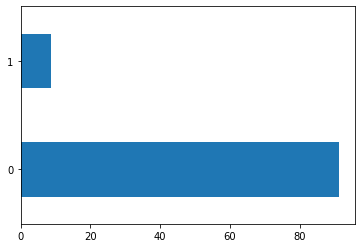

In [37]:
# Checking the data balance in the target column

(churn['churn'].value_counts()/churn.shape[0] *100).plot.barh();

In [38]:
#dropping columns related to 9th month i.e churn month

churn.drop(churn.filter(regex='_9'),axis=1,inplace=True)

Many columns are redundant because their total is already present in columns `total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9`, so we will drop all such columns

In [39]:
# Dropping redundant columns

redundant_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']

churn.drop(redundant_cols, axis = 1, inplace = True)

In [40]:
churn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2782 entries, 0 to 9264
Data columns (total 102 columns):
 #   Column                Dtype  
---  ------                -----  
 0   arpu_6                float64
 1   arpu_7                float64
 2   arpu_8                float64
 3   onnet_mou_6           float64
 4   onnet_mou_7           float64
 5   onnet_mou_8           float64
 6   offnet_mou_6          float64
 7   offnet_mou_7          float64
 8   offnet_mou_8          float64
 9   roam_ic_mou_6         float64
 10  roam_ic_mou_7         float64
 11  roam_ic_mou_8         float64
 12  roam_og_mou_6         float64
 13  roam_og_mou_7         float64
 14  roam_og_mou_8         float64
 15  loc_og_mou_6          float64
 16  loc_og_mou_7          float64
 17  loc_og_mou_8          float64
 18  std_og_mou_6          float64
 19  std_og_mou_7          float64
 20  std_og_mou_8          float64
 21  isd_og_mou_6          float64
 22  isd_og_mou_7          float64
 23  isd_og_mou_8

#### Checking columns ARPU - Average revenue per user

In [41]:
# checking description of arpu columns

arpu = ['arpu_6','arpu_7','arpu_8']

for i in arpu:
    print('\n--------',i,'---------\n')
    print(churn[i].describe())
    print('\n')


-------- arpu_6 ---------

count    2782.000000
mean      565.902073
std       418.839189
min     -2041.228000
25%       311.654500
50%       489.327500
75%       709.821500
max      5080.971000
Name: arpu_6, dtype: float64



-------- arpu_7 ---------

count    2782.000000
mean      553.032433
std       415.045919
min     -2014.045000
25%       308.780000
50%       473.136000
75%       690.323000
max      6453.689000
Name: arpu_7, dtype: float64



-------- arpu_8 ---------

count    2782.000000
mean      503.795938
std       404.921625
min      -945.808000
25%       242.263250
50%       434.576500
75%       673.637750
max      4269.998000
Name: arpu_8, dtype: float64




#### Average revenue per user cant be negative, wo will impute negative values with zero

In [42]:
# Checking number of negative values

print('No. of negative values in arpu_6:',len(churn[churn['arpu_6'] < 0]))
print('No. of negative values in arpu_7:',len(churn[churn['arpu_7'] < 0]))
print('No. of negative values in arpu_8:',len(churn[churn['arpu_8'] < 0]))
print('Total number of negative values in arpu columns:',len(churn[churn['arpu_6'] < 0]) + len(churn[churn['arpu_7'] < 0])
     + len(churn[churn['arpu_8'] < 0]))

No. of negative values in arpu_6: 5
No. of negative values in arpu_7: 3
No. of negative values in arpu_8: 12
Total number of negative values in arpu columns: 20


In [43]:
# Dropping negative values rows 

churn = churn[(churn['arpu_6'] >= 0) & 
              (churn['arpu_7'] >= 0) & 
              (churn['arpu_8'] >= 0)]

In [44]:
# checking description of arpu columns

arpu = ['arpu_6','arpu_7','arpu_8']

for i in arpu:
    print('\n--------',i,'---------\n')
    print(churn[i].describe())
    print('\n')


-------- arpu_6 ---------

count    2763.000000
mean      568.085294
std       415.356999
min         0.000000
25%       313.235500
50%       490.012000
75%       709.690000
max      5080.971000
Name: arpu_6, dtype: float64



-------- arpu_7 ---------

count    2763.000000
mean      553.914341
std       406.380480
min         0.000000
25%       309.713500
50%       474.010000
75%       690.710500
max      6453.689000
Name: arpu_7, dtype: float64



-------- arpu_8 ---------

count    2763.000000
mean      505.099056
std       399.419707
min         0.000000
25%       246.412000
50%       437.681000
75%       674.148000
max      4269.998000
Name: arpu_8, dtype: float64




# Exploratory Data Analysis

In [143]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = churn
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False)
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False)
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False)
    plt.show()

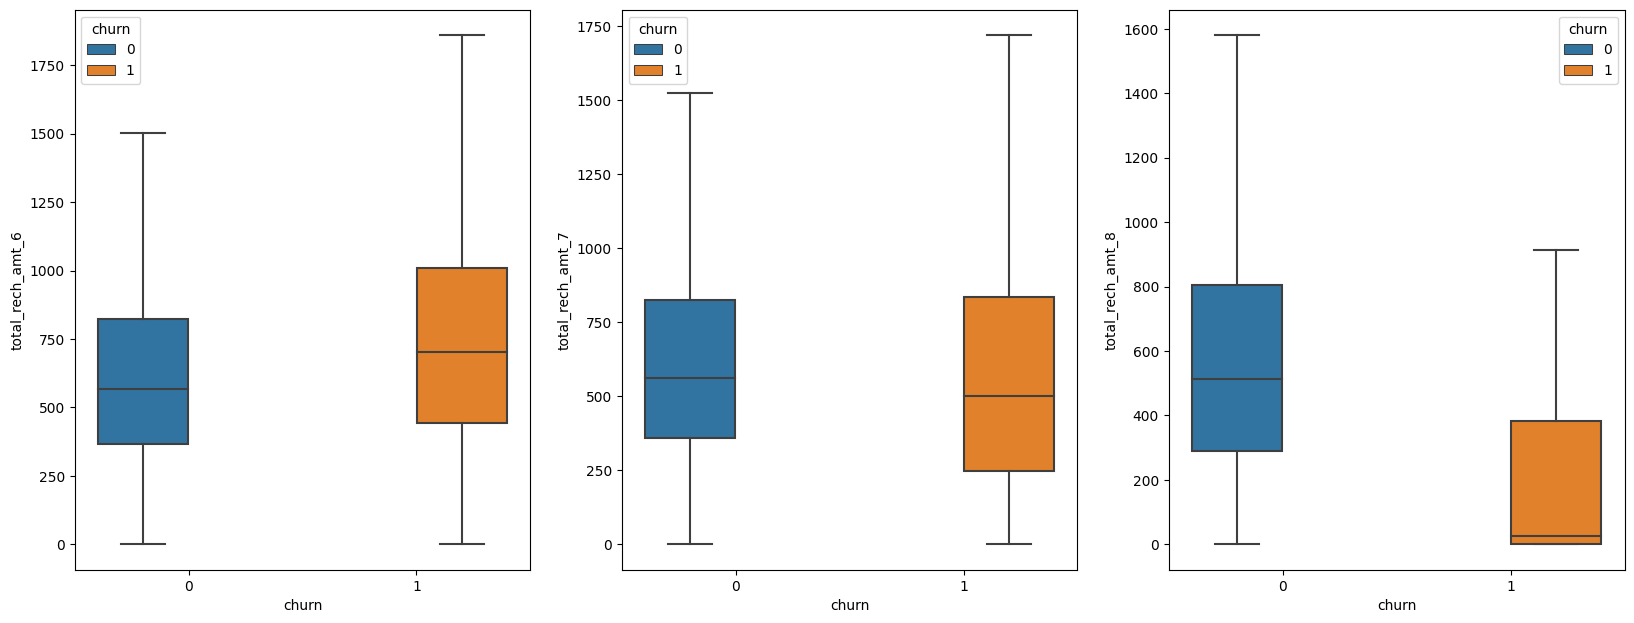

In [144]:
# Boxplot of total_rech_amt
plot_box_chart('total_rech_amt')

<b>Inference</b><br>
Total recharge amount has significantly decreased in the 8th month.

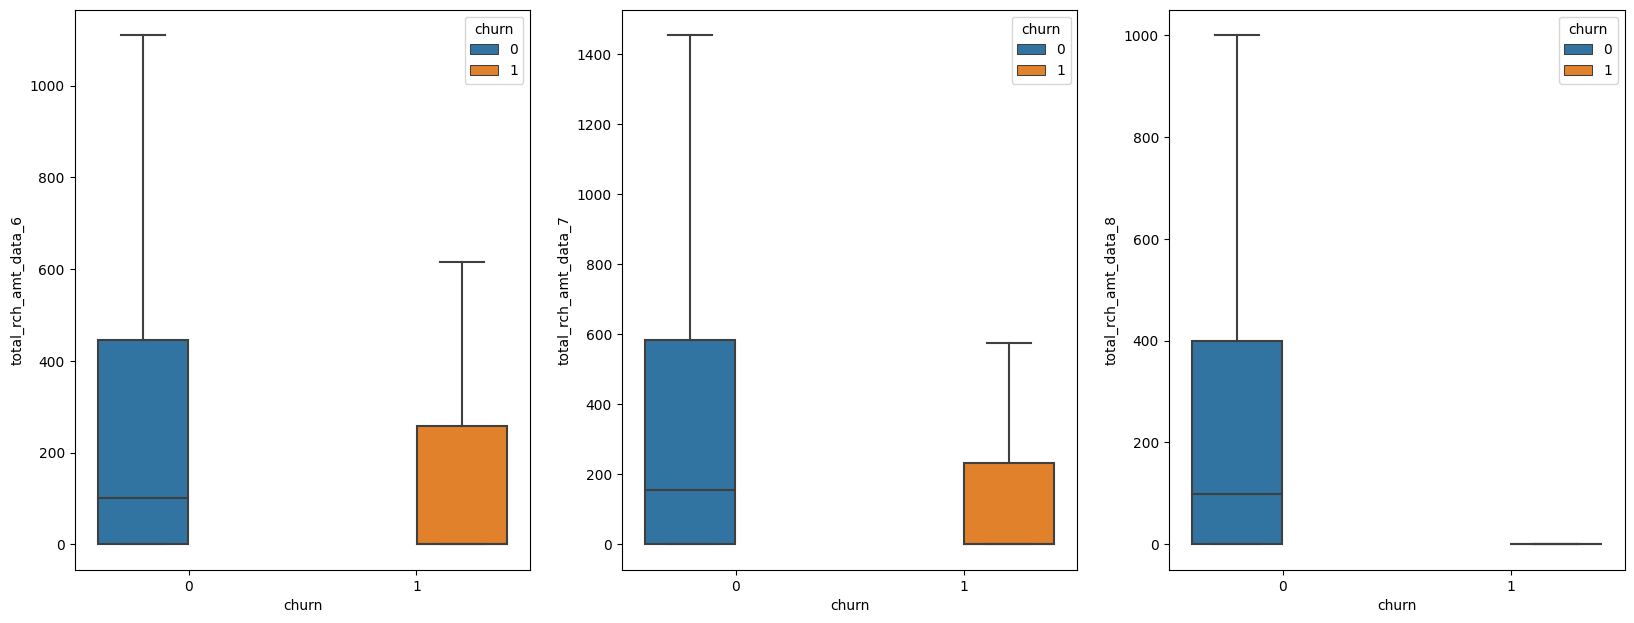

In [146]:
# Boxplot for totala recharge amount for data
plot_box_chart('total_rch_amt_data')

<b>Inference</b><br>
Similar pattern can be scene for data recharge in 8th month

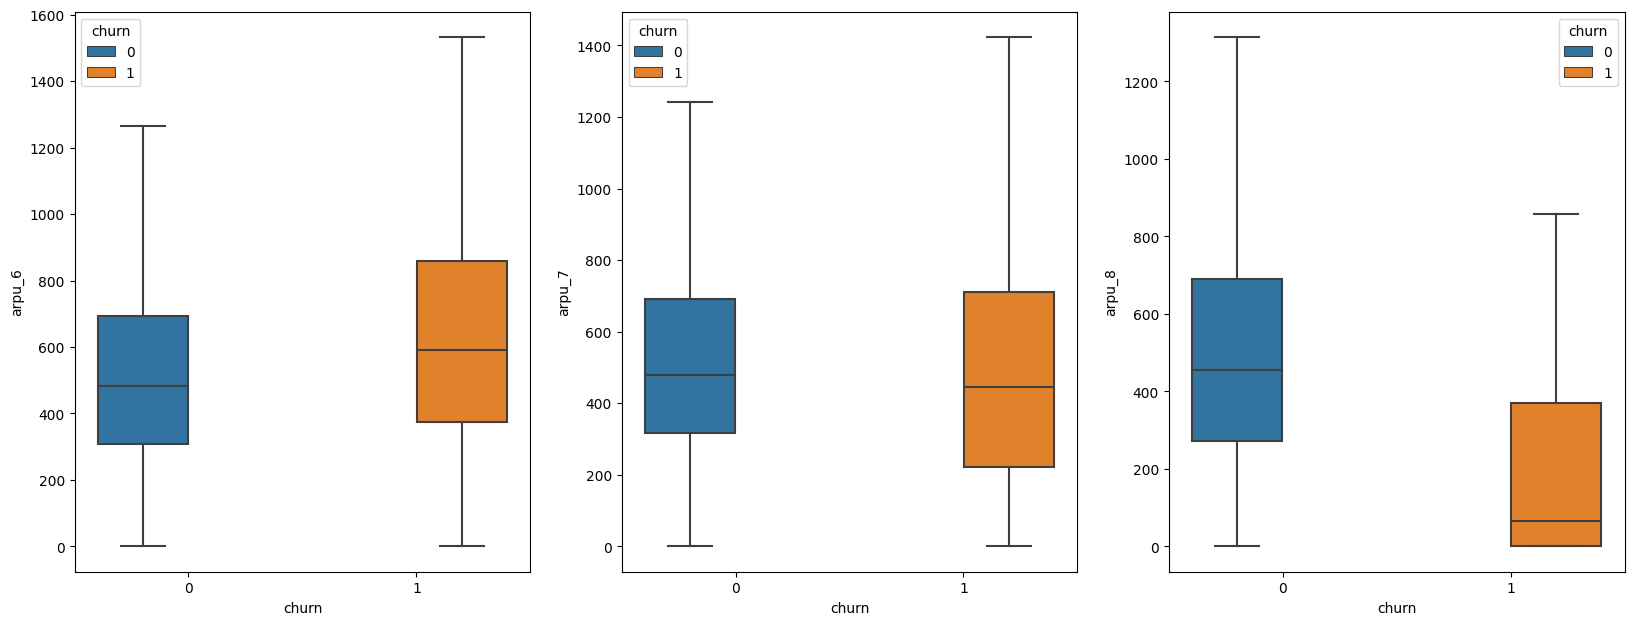

In [147]:
plot_box_chart('arpu')

**Inference**<br>
Average revenue per user started decreasing towards 8th month

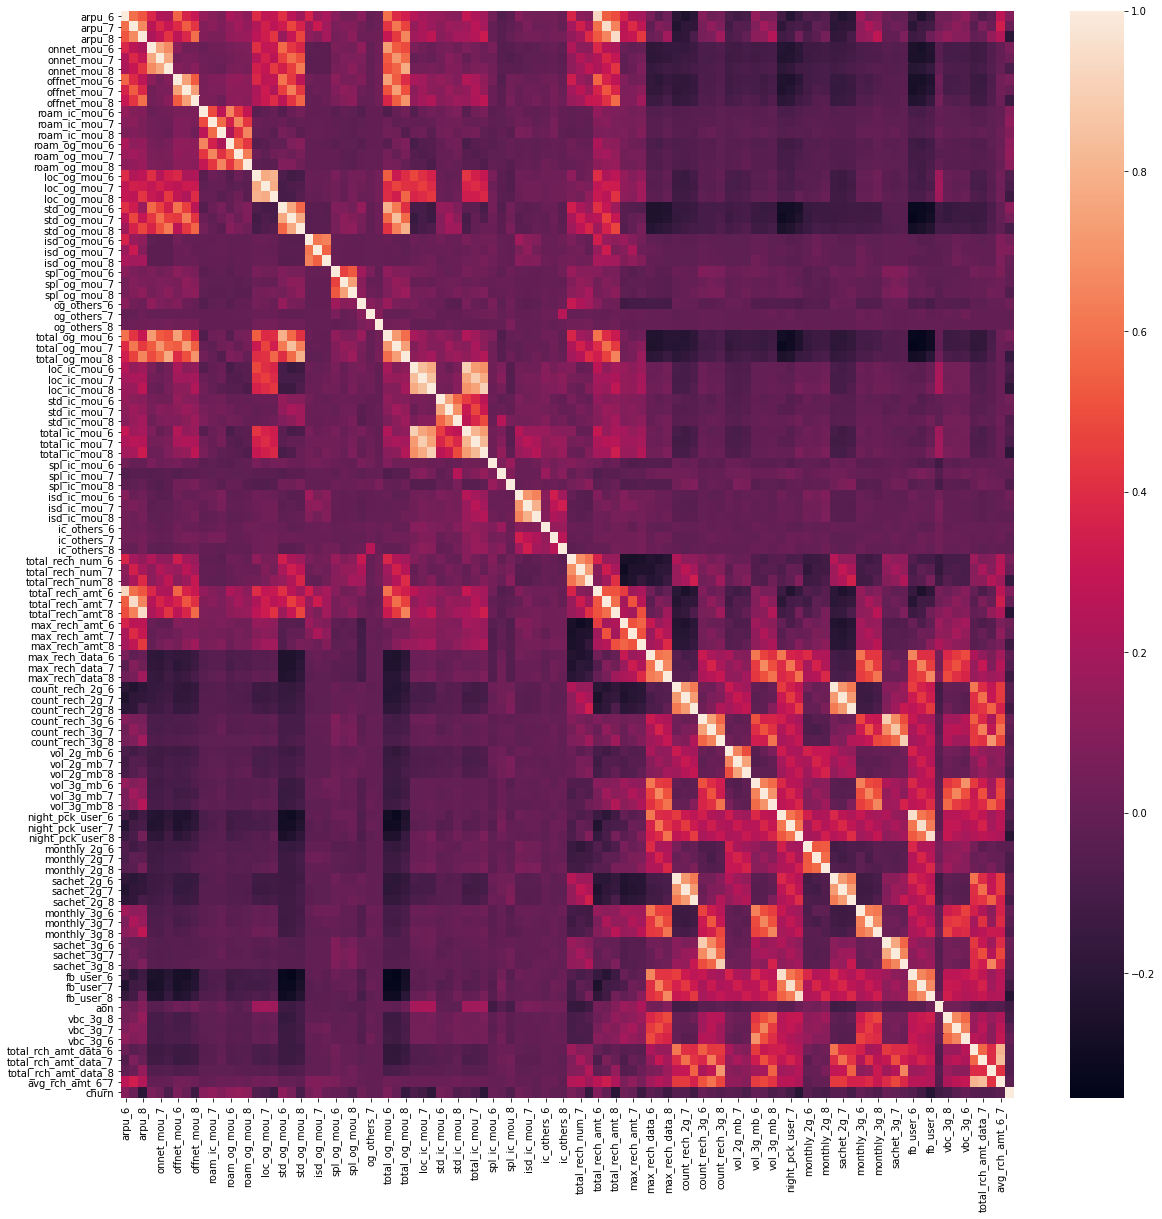

In [45]:
# Plotting correlation matrix 
plt.figure(figsize = (20,20))        
sns.heatmap(churn.corr())
plt.show()

In [46]:
#Checking multicollinearity

churn.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(12)

churn             churn               1.000000
sachet_2g_8       count_rech_2g_8     0.988808
sachet_2g_7       count_rech_2g_7     0.987823
sachet_2g_6       count_rech_2g_6     0.984717
night_pck_user_7  fb_user_7           0.960284
fb_user_6         night_pck_user_6    0.958230
night_pck_user_8  fb_user_8           0.953473
total_rech_amt_8  arpu_8              0.945788
arpu_7            total_rech_amt_7    0.941775
arpu_6            total_rech_amt_6    0.930276
total_ic_mou_8    loc_ic_mou_8        0.900569
count_rech_3g_8   sachet_3g_8         0.899326
dtype: float64

#### We wont drop these highly correlated features because PCA will take care of this

### Checking data imbalance

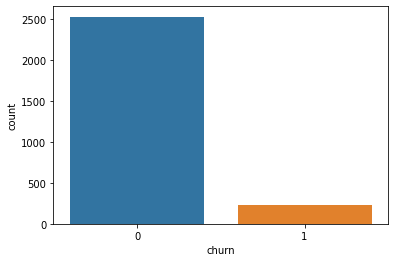

In [47]:
sns.countplot(churn.churn)
plt.show()

In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Separating dependent and independent variable
y = churn.churn
X = churn.drop('churn', axis=1)
# scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, test_size=0.3, random_state=100)


sm = SMOTE(random_state=100)
X_train, y_train = sm.fit_resample(X_train, y_train)

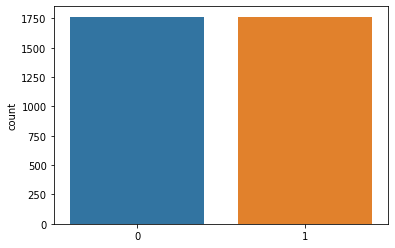

In [49]:
# Checking data imbalance again

sns.countplot(y_train)
plt.show()

## Performing PCA

In [50]:
#Importing the PCA 
from sklearn.decomposition import PCA

#Instantiating PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [51]:
# PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [52]:
pca.components_

array([[ 1.55862855e-01,  1.57455383e-01,  8.45823465e-02, ...,
        -8.83824917e-02, -5.02419250e-02, -2.75065474e-02],
       [ 7.98496818e-02,  1.85852906e-01,  1.42360086e-01, ...,
         2.71302985e-02,  3.08346356e-02,  7.44517135e-02],
       [ 6.89731860e-02,  1.74873125e-01,  1.57228360e-01, ...,
         9.15965176e-02,  7.36742726e-02,  1.40565565e-01],
       ...,
       [-0.00000000e+00,  1.99222867e-17,  1.92394338e-16, ...,
         1.31226769e-01,  9.85927398e-17, -2.35436218e-01],
       [-0.00000000e+00, -7.06872907e-17, -1.64878518e-17, ...,
         3.09123487e-02, -1.05498430e-16, -5.54603799e-02],
       [-0.00000000e+00, -3.06898795e-16, -9.44736073e-17, ...,
         1.49893086e-01,  2.40501892e-16, -2.68925781e-01]])

In [53]:
pca.explained_variance_ratio_

array([1.34356664e-01, 1.01938737e-01, 8.84391244e-02, 6.41849652e-02,
       5.17196082e-02, 4.46060733e-02, 3.58899502e-02, 3.02991385e-02,
       2.85886679e-02, 2.53745826e-02, 2.09867076e-02, 1.99372909e-02,
       1.97310829e-02, 1.88380500e-02, 1.74898661e-02, 1.70552598e-02,
       1.48885055e-02, 1.40954479e-02, 1.24797509e-02, 1.21417731e-02,
       1.05572377e-02, 1.02424757e-02, 9.77549110e-03, 9.48032765e-03,
       8.75056511e-03, 8.42169888e-03, 8.26648532e-03, 7.92073072e-03,
       7.76423253e-03, 7.45495588e-03, 7.06718637e-03, 6.49853547e-03,
       5.97300373e-03, 5.75372644e-03, 5.66362864e-03, 5.36200745e-03,
       5.16195796e-03, 5.05284578e-03, 4.94383417e-03, 4.78717530e-03,
       4.73528205e-03, 4.43303589e-03, 4.15973192e-03, 3.82520408e-03,
       3.66964430e-03, 3.49256535e-03, 3.32987448e-03, 3.07814323e-03,
       3.00894662e-03, 2.87163866e-03, 2.75367324e-03, 2.71006127e-03,
       2.46598657e-03, 2.40975669e-03, 2.39802370e-03, 2.17771830e-03,
      

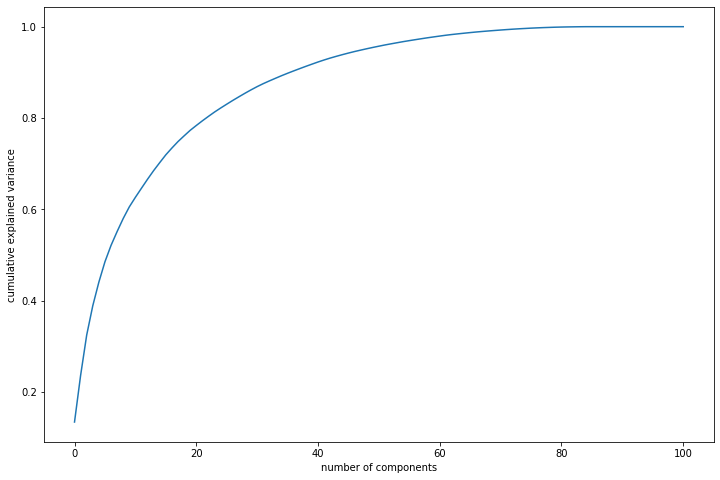

In [54]:
# Screeplot to check the number of important principal components
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Around 45 components are able to explain 90% variance

In [55]:
pca_final = PCA(n_components=45)

In [56]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(3528, 45)

In [57]:
#Applying selected components to the test data 
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(829, 45)

# Logistic Regresssion on PC

In [58]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log_reg = LogisticRegression()
model_pca = log_reg.fit(df_train_pca,y_train)

In [59]:
y_train_pred = model_pca.predict_proba(df_train_pca)[:,1]
y_train_pred

array([0.16932344, 0.07975002, 0.1271415 , ..., 0.82060739, 0.79826138,
       0.89057771])

In [60]:
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

Churn  Churn_Prob
0      0    0.169323
1      0    0.079750
2      0    0.127142
3      0    0.000955
4      0    0.015577

In [61]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.169323    1    1    0    0    0    0    0    0    0    0
1      0    0.079750    1    0    0    0    0    0    0    0    0    0
2      0    0.127142    1    1    0    0    0    0    0    0    0    0
3      0    0.000955    1    0    0    0    0    0    0    0    0    0
4      0    0.015577    1    0    0    0    0    0    0    0    0    0

In [62]:
# Calculating Accuracy Sensitivity and Specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.761054  0.986961  0.535147
0.2   0.2  0.814059  0.968254  0.659864
0.3   0.3  0.847789  0.947846  0.747732
0.4   0.4  0.861961  0.918934  0.804989
0.5   0.5  0.869048  0.883220  0.854875
0.6   0.6  0.866213  0.839569  0.892857
0.7   0.7  0.857143  0.790249  0.924036
0.8   0.8  0.825964  0.701814  0.950113
0.9   0.9  0.699263  0.428005  0.970522


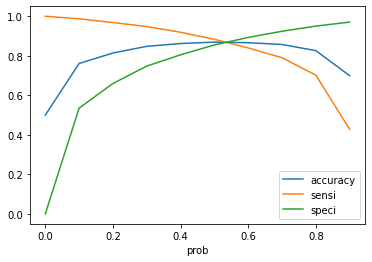

In [63]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 can be as a cutoff probability.

In [64]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0      0    0.169323    1    1    0    0    0    0    0    0    0    0   
1      0    0.079750    1    0    0    0    0    0    0    0    0    0   
2      0    0.127142    1    1    0    0    0    0    0    0    0    0   
3      0    0.000955    1    0    0    0    0    0    0    0    0    0   
4      0    0.015577    1    0    0    0    0    0    0    0    0    0   

   final_predicted  
0                0  
1                0  
2                0  
3                0  
4                0

In [65]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion

array([[1508,  256],
       [ 206, 1558]])

In [66]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
y_test_df=pd.DataFrame(y_test)
y_pred_df=pd.DataFrame(pred_probs_test)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_df.reset_index(drop=True, inplace=True)
y_test_pred_final=pd.concat([y_test_df, y_pred_df],axis=1)


In [67]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Churn_prob'})

In [68]:
# Creating prediction with cutoff set as 0.5
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)

In [69]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted )

In [70]:
confusion2

array([[660, 104],
       [ 10,  55]])

In [71]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [72]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8461538461538461

In [73]:
# Positive predictive value 
print (TP / float(TP+FP))

0.34591194968553457


In [74]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9850746268656716


In [75]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, pred_probs_test, drop_intermediate = False )

In [76]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

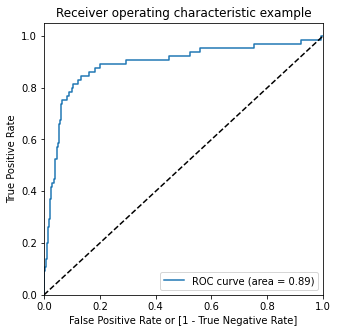

In [77]:
draw_roc(y_test, pred_probs_test)

#### Using SVM Model

In [78]:
# using rbf kernel, C=1, default value of gamma
from sklearn.svm import SVC
model = SVC(C = 1, kernel='rbf')
model.fit(df_train_pca,y_train)
y_pred = model.predict(df_test_pca)

In [79]:
# confusion matrix

confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[677,  87],
       [ 16,  49]])

In [80]:
from sklearn import metrics
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.8757539203860072
precision 0.3602941176470588
recall 0.7538461538461538


# Hyperparameter Tuning

In [81]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds,
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(df_train_pca,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   30.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [82]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.498424      0.027070         0.090864        0.003614       1   
1        0.540384      0.014375         0.110456        0.002429       1   
2        0.836763      0.021762         0.182651        0.012880       1   
3        0.397715      0.007539         0.060568        0.001157      10   
4        0.440858      0.009350         0.080712        0.001579      10   
5        0.536188      0.011342         0.111295        0.005648      10   
6        0.449492      0.009823         0.043353        0.001414     100   
7        0.517648      0.008773         0.067589        0.002691     100   
8        0.469609      0.017974         0.085697        0.003744     100   
9        0.511918      0.021252         0.038001        0.000885    1000   
10       1.065986      0.048336         0.051481        0.001896    1000   
11       0.629736      0.037118         0.073469        0.002412    1000   

   param_gamma                        params  split0_test_score  \
0         0.01       {'C': 1, 'gamma': 0.01}           0.972609   
1        0.001      {'C': 1, 'gamma': 0.001}           0.938783   
2       0.0001     {'C': 1, 'gamma': 0.0001}           0.913503   
3         0.01      {'C': 10, 'gamma': 0.01}           0.984302   
4        0.001     {'C': 10, 'gamma': 0.001}           0.950235   
5       0.0001    {'C': 10, 'gamma': 0.0001}           0.936046   
6         0.01     {'C': 100, 'gamma': 0.01}           0.983821   
7        0.001    {'C': 100, 'gamma': 0.001}           0.966887   
8       0.0001   {'C': 100, 'gamma': 0.0001}           0.942073   
9         0.01    {'C': 1000, 'gamma': 0.01}           0.987192   
10       0.001   {'C': 1000, 'gamma': 0.001}           0.972449   
11      0.0001  {'C': 1000, 'gamma': 0.0001}           0.948204   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.965162           0.939284           0.953384   
1            0.926086           0.896622           0.930101   
2            0.909129           0.871032           0.899501   
3            0.990289           0.974780           0.977384   
4            0.935861           0.911863           0.943911   
5            0.919746           0.890628           0.929384   
6            0.989198           0.978283           0.977191   
7            0.964030           0.941823           0.957618   
8            0.924642           0.897714           0.937594   
9            0.982216           0.976170           0.969803   
10           0.977336           0.961588           0.975710   
11           0.938646           0.913100           0.946503   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0            0.967495         0.959587        0.011949                5   
1            0.924794         0.923277        0.014196               10   
2            0.890590         0.896751        0.015105               12   
3            0.987154         0.982782        0.005847                2   
4            0.944091         0.937192        0.013463                8   
5            0.922418         0.919645        0.015579               11   
6            0.989852         0.983669        0.005288                1   
7            0.963025         0.958677        0.008946                6   
8            0.930150         0.926435        0.015563                9   
9            0.986470         0.980370        0.006580                3   
10           0.977780         0.972973        0.005992                4   
11           0.943173         0.937925        0.012834                7   

    split0_train_score  split1_train_score  split2_train_score  \
0             0.967352            0.968296            0.970945   
1             0.922876            0.927087            0.934302   
2             0.894804            0.899211            0.906123   
3             0.995888            0.994585            0.995871   
4             0.9

In [84]:
# printing the optimal roc score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9836690464132849 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


In [85]:
# specify optimal hyperparameters
best_params = {"C": 100, "gamma": 0.01, "kernel":"rbf"}

# model
model = SVC(C=100, gamma=0.01, kernel="rbf")

model.fit(df_train_pca,y_train)
y_pred = model.predict(df_test_pca)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred))
print("roc_auc_score", metrics.roc_auc_score(y_test, y_pred))


[[708  56]
 [ 28  37]] 

accuracy 0.8986731001206273
precision 0.3978494623655914
sensitivity/recall 0.5692307692307692
roc_auc_score 0.7479661699556988


# Random Forest

In [86]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
# Making predictions
predictions = rfc.predict(df_test_pca)

In [88]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [89]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       764
           1       0.45      0.48      0.46        65

    accuracy                           0.91       829
   macro avg       0.70      0.71      0.71       829
weighted avg       0.92      0.91      0.91       829



In [90]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [3, 6]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring= 'roc_auc', 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  2.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [91]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=6,
                             n_estimators=200)

In [92]:
# fit
rfc.fit(df_train_pca,y_train)
# making predictions
predictions = rfc.predict(df_test_pca)

In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       764
           1       0.36      0.72      0.48        65

    accuracy                           0.88       829
   macro avg       0.67      0.81      0.71       829
weighted avg       0.93      0.88      0.90       829



In [94]:
# Checking metrics
print(metrics.confusion_matrix(y_test, predictions), "\n")
print("accuracy", metrics.accuracy_score(y_test, predictions))
print("precision", metrics.precision_score(y_test, predictions))
print("sensitivity/recall", metrics.recall_score(y_test, predictions))
print("roc_auc_score", metrics.roc_auc_score(y_test, predictions))

[[682  82]
 [ 18  47]] 

accuracy 0.879372738238842
precision 0.3643410852713178
sensitivity/recall 0.7230769230769231
roc_auc_score 0.807873540072493


## Best model among all is first one i.e Logistic regression model which gives recall of 84% and ROC value of .89

### Model Building for identifying important predictor attributes which help the business understand indicators of churn


In [96]:
# Seperating dependent and independent variable
y = churn.churn
X = churn.drop('churn', axis=1)
# scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled_df=pd.DataFrame(X_scaled,columns=X.columns)
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, train_size=0.7, test_size=0.3, random_state=100)


In [97]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 60)             # running RFE with 60 variables as output
rfe = rfe.fit(X_train, y_train)

In [98]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False, False, False,  True,
       False,  True,  True,  True, False, False, False,  True,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True,  True, False, False,  True, False, False,  True,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
       False, False,  True, False,  True,  True, False,  True,  True,
       False,  True,  True, False,  True, False, False, False,  True,
       False,  True, False, False,  True,  True, False,  True, False,
       False,  True,  True,  True,  True, False,  True, False,  True,
        True,  True])

In [99]:
X_scaled_df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.892648 -0.834587 -0.729430    -0.567983    -0.556541    -0.488966   
1  1.206638  1.958952  6.676845    -0.444691    -0.444448    -0.383907   
2 -0.455990 -0.151834 -0.920845     0.313842     0.163062    -0.418485   
3 -0.129147  0.107895  0.332194    -0.349685    -0.285719    -0.317906   
4 -1.188916 -0.886072 -0.345897    -0.463620    -0.452689    -0.421498   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0     -0.785855     -0.740933     -0.744388      -0.217985      -0.171584   
1      0.144394      0.370860     -0.011511       0.023342       0.329523   
2     -0.591652     -0.582876     -0.437484      -0.217985      -0.171584   
3      0.769100      1.016812      1.466970      -0.217985      -0.171584   
4     -0.610629     -0.565762     -0.281401      -0.217985      -0.171584   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  \
0      -0.204668      -0.221828      -0.210381      -0.230130     -0.623264   
1       0.370691      -0.027665      -0.075931       0.244787      0.364299   
2      -0.204668      -0.221828      -0.210381      -0.230130      0.261205   
3      -0.204668      -0.221828      -0.210381      -0.230130     -0.396257   
4      -0.204668      -0.221828      -0.210381      -0.230130     -0.314686   

   loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
0     -0.666475     -0.588263     -0.585424     -0.570097     -0.523375   
1      0.707658      0.017003     -0.483205     -0.452312     -0.388116   
2      0.075218     -0.439093     -0.366643     -0.345187     -0.352599   
3     -0.424314     -0.281264      0.696576      0.895063      1.107914   
4     -0.322421     -0.157272     -0.581460     -0.560143     -0.454547   

   isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
0      -0.09538     -0.082710     -0.097435     -0.327045     -0.251244   
1      -0.09538     -0.074895      0.644680     -0.095749     -0.251244   
2      -0.09538     -0.082710     -0.097435     -0.327045     -0.251244   
3      -0.09538     -0.082710     -0.097435     -0.327045     -0.251244   
4      -0.09538     -0.082276     -0.097435     -0.321905     -0.251244   

   spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  \
0     -0.310126    -0.330431    -0.038265    -0.040555       -0.881249   
1     -0.023054    -0.330431    -0.038265    -0.040555       -0.192959   
2      0.141681    -0.330431    -0.038265    -0.040555       -0.163552   
3     -0.310126    -0.330431    -0.038265    -0.040555        0.333370   
4      0.472034    -0.330431    -0.038265    -0.040555       -0.691533   

   total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0       -0.873666       -0.797203     -0.780106     -0.808060     -0.757393   
1       -0.031928       -0.297107      0.670214      0.458000     -0.102438   
2       -0.277276       -0.552182     -0.504095     -0.723129     -0.720269   
3        0.547730        0.728880     -0.355294     -0.495564     -0.206205   
4       -0.680184       -0.455179     -0.384783     -0.186453      0.027298   

   std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  \
0     -0.375956     -0.375368     -0.363375       -0.858322       -0.879366   
1      1.011822      0.886786      1.160178        0.986811        0.810423   
2     -0.203540     -0.341385     -0.357483       -0.552420       -0.793096   
3      0.252518     -0.052974      0.437366       -0.248373       -0.479993   
4     -0.353356     -0.266785      0.086683       -0.506119       -0.204438   

   total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  \
0       -0.819165     -0.420022     -0.135695     -0.247926     -0.181676   
1        0.472565      1.094641     -0.135695     -0.247926     -0.148942   
2       -0.785293     -0.420022     -0.135695     -0.247926     -0.181676   
3       -0.039184

In [100]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 31),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 11),
 ('offnet_mou_7', False, 39),
 ('offnet_mou_8', False, 17),
 ('roam_ic_mou_6', True, 1),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_6', False, 22),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_mou_6', True, 1),
 ('loc_og_mou_7', True, 1),
 ('loc_og_mou_8', True, 1),
 ('std_og_mou_6', True, 1),
 ('std_og_mou_7', False, 20),
 ('std_og_mou_8', True, 1),
 ('isd_og_mou_6', False, 13),
 ('isd_og_mou_7', True, 1),
 ('isd_og_mou_8', False, 14),
 ('spl_og_mou_6', False, 25),
 ('spl_og_mou_7', False, 26),
 ('spl_og_mou_8', True, 1),
 ('og_others_6', False, 19),
 ('og_others_7', True, 1),
 ('og_others_8', True, 1),
 ('total_og_mou_6', True, 1),
 ('total_og_mou_7', False, 10),
 ('total_og_mou_8', False, 4),
 ('loc_ic_mou_6', False, 38),
 ('loc_ic_mou_7', True, 1),
 ('lo

In [101]:
col = X_train.columns[rfe.support_]

In [102]:
X_train.columns[~rfe.support_]

Index(['onnet_mou_6', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6', 'total_og_mou_7',
       'total_og_mou_8', 'loc_ic_mou_6', 'std_ic_mou_6', 'total_ic_mou_6',
       'spl_ic_mou_6', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_8',
       'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_8',
       'max_rech_data_6', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_3g_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'night_pck_user_6',
       'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_6',
       'sachet_2g_8', 'monthly_3g_6', 'sachet_3g_6', 'sachet_3g_8',
       'fb_user_6', 'vbc_3g_7', 'total_rch_amt_data_6'],
      dtype='object')

In [103]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
rfc.fit(X_train[col],y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
# Making predictions
predictions = rfc.predict(X_test[col])

In [105]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       764
           1       0.71      0.52      0.60        65

    accuracy                           0.95       829
   macro avg       0.83      0.75      0.79       829
weighted avg       0.94      0.95      0.94       829



### Hyperparameter Tuning

In [106]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,12,16],
    'min_samples_leaf': range(100, 800, 200),
    'min_samples_split': range(200, 1000, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [6,9,12]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring= 'roc_auc', 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train[col],y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:  6.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [107]:
# printing the optimal accuracy score and hyperparameters
print('We can get best score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best score of 0.8749682099239028 using {'max_depth': 16, 'max_features': 12, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [123]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=16,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=12,
                             n_estimators=200)

In [124]:
# fit
rfc.fit(X_train[col],y_train)
# predict
predictions = rfc.predict(X_test[col])

In [125]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       764
           1       0.81      0.20      0.32        65

    accuracy                           0.93       829
   macro avg       0.87      0.60      0.64       829
weighted avg       0.93      0.93      0.91       829



In [126]:
# Checking metrics
print(metrics.confusion_matrix(y_test, predictions), "\n")
print("accuracy", metrics.accuracy_score(y_test, predictions))
print("precision", metrics.precision_score(y_test, predictions))
print("sensitivity/recall", metrics.recall_score(y_test, predictions))
print("roc_auc_score", metrics.roc_auc_score(y_test, predictions))

[[761   3]
 [ 52  13]] 

accuracy 0.9336550060313631
precision 0.8125
sensitivity/recall 0.2
roc_auc_score 0.5980366492146596


#### Advanced Metrics beyond simply accuracy

In [127]:
confusion=metrics.confusion_matrix(y_test, predictions)

In [128]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model
Senstivity = TP / float(TP+FN)
Senstivity

0.2

In [130]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.9960732984293194

In [131]:
# Calculate false postive rate - predicting conversion when customer have not converted
FPR=FP/ float(TN+FP)
FPR

0.003926701570680628

In [132]:
# positive predictive value 
PPV = TP / float(TP+FP)
PPV

0.8125

In [133]:
# Negative predictive value
NPV = TN / float(TN+ FN)
NPV

0.9360393603936039

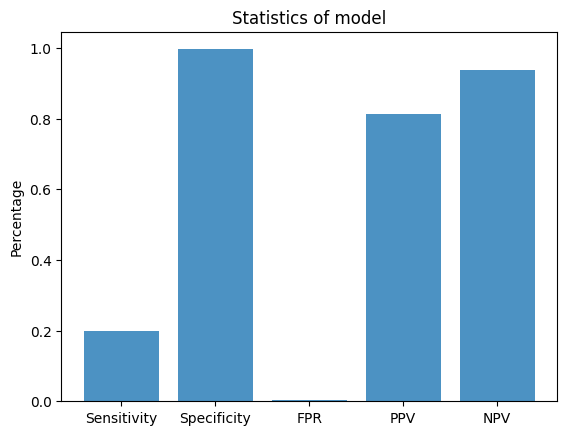

In [134]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Sensitivity', 'Specificity', 'FPR', 'PPV', 'NPV')
y_pos = np.arange(len(objects))
values = [Senstivity,specificity,FPR,PPV,NPV]

plt.bar(y_pos, values, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Statistics of model')

plt.show()

#### Finding important features in original data on which our model depends

In [139]:
def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    '''
    plot feature importances of a tree-based sklearn estimator
    
    Note: X_train and y_train are pandas DataFrames
    
    Note: Scikit-plot is a lovely package but I sometimes have issues
              1. flexibility/extendibility
              2. complicated models/datasets
          But for many situations Scikit-plot is the way to go
          see https://scikit-plot.readthedocs.io/en/latest/Quickstart.html
    
    Parameters
    ----------
        clf         (sklearn estimator) if not fitted, this routine will fit it
        
        X_train     (pandas DataFrame)
        
        y_train     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    Returns
    -------
        the pandas dataframe with the features and their importance
        
    '''
    
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except ( ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

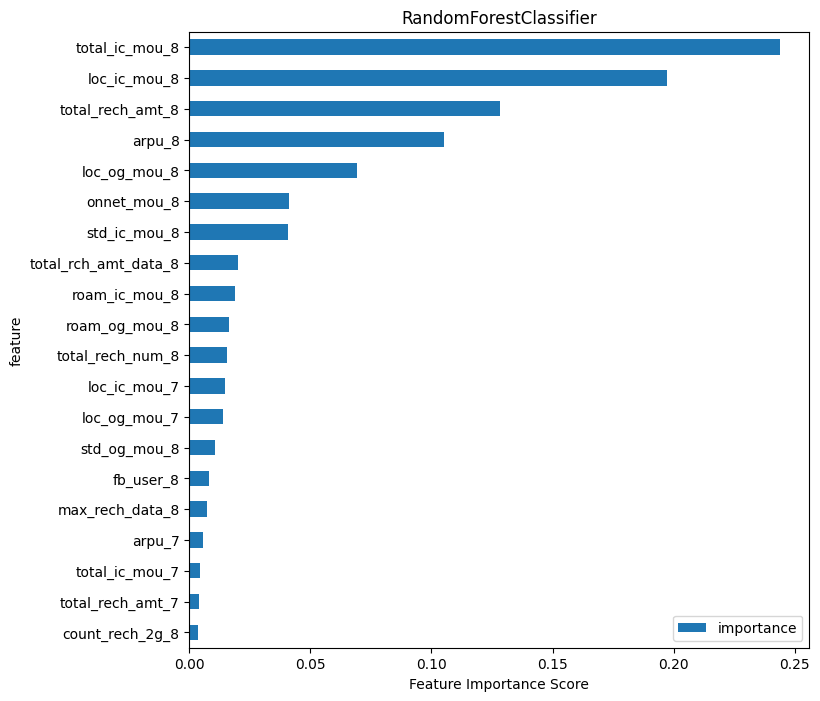

importance
feature                         
count_rech_2g_8         0.003672
total_rech_amt_7        0.004045
total_ic_mou_7          0.004418
arpu_7                  0.005586
max_rech_data_8         0.007165
fb_user_8               0.008081
std_og_mou_8            0.010770
loc_og_mou_7            0.013869
loc_ic_mou_7            0.014708
total_rech_num_8        0.015682
roam_og_mou_8           0.016473
roam_ic_mou_8           0.019051
total_rch_amt_data_8    0.020072
std_ic_mou_8            0.040864
onnet_mou_8             0.041169
loc_og_mou_8            0.069188
arpu_8                  0.105273
total_rech_amt_8        0.128375
loc_ic_mou_8            0.197166
total_ic_mou_8          0.243810

In [136]:
#Plotting importance-wise top-20 features

plot_feature_importances(rfc, X_train[col], y_train, top_n=20,title=rfc.__class__.__name__)

## These are the Top 20 features with their scores which are important in predicting churn.
 



**Inference**<br>
- A majority of churn indicators are associated with 8th month.
- More specifically Total recharge amount, talk time minutes are early indicators of churn.
- Offers can be given to the customers showing such behaviour.
- If incoming calls (which are not chargeable) are less, there's a possibilty that the customer has stopped using the numbers as his primary one citing some network issues. So the company should focus on feedback loop for the network quality for such identified customers.